In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
from torchvision.datasets import MNIST
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import itertools
import operator
import pandas as pd
from tqdm.notebook import tqdm

from src.dataset import BarCodeDataset
from src.lightning_module import OCRModule
from src.transforms import get_transforms
from src.predict_utils import matrix_to_string

In [6]:
DEVICE = 'cuda:0'
VOCAB = '0123456789'

In [7]:
transforms = get_transforms(width=416, height=96, text_size=13, vocab=VOCAB, postprocessing=True, augmentations=False)

In [8]:
df = pd.read_csv('C:/Users/julia/CV/hw_mini_16-ocr/data/df_valid.csv')
dataset = BarCodeDataset(
    df=df,
    data_folder='../data',
)
len(dataset)

81

In [21]:
module = OCRModule.load_from_checkpoint('../experiments/exp8/epoch_epoch=48-valid_ctc_loss=0.218.ckpt')

_ = module.to(DEVICE)
_ = module.eval()

In [22]:
gt_texts = []
pr_texts = []

for i in range(len(dataset)):
    image, text, _ = dataset[i]

    transformed_image = transforms(image=image, text='')['image']
    predict = module(transformed_image[None].to(DEVICE)).cpu().detach()
    string_pred, _ = matrix_to_string(predict, VOCAB)

    gt_texts.append(text)
    pr_texts.append(string_pred[0])

gt_texts = np.array(gt_texts)
pr_texts = np.array(pr_texts)

In [23]:
print(f'accuracy = {np.mean(gt_texts == pr_texts)}')

accuracy = 0.7283950617283951


In [24]:
# ошибочные индексы
np.where(gt_texts != pr_texts)[0]

array([ 1,  5, 12, 22, 27, 29, 30, 33, 34, 35, 37, 42, 44, 49, 50, 53, 60,
       67, 72, 73, 74, 75], dtype=int64)

pred = 4607044554603
true = 4607044554603


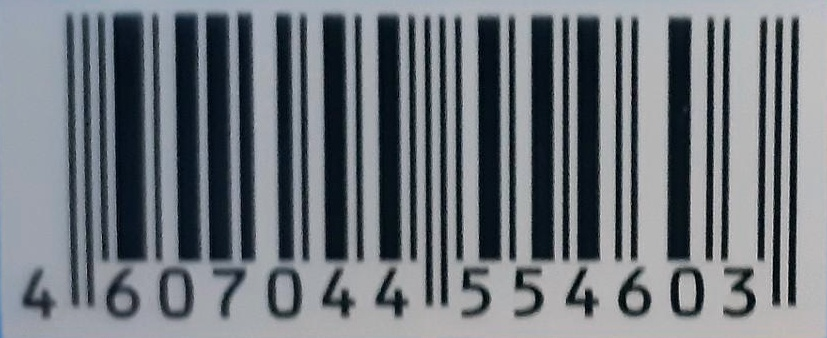

In [25]:
idx = 10
image, text, _ = dataset[idx]
print(f'pred = {pr_texts[idx]}')
print(f'true = {gt_texts[idx]}')
Image.fromarray(image)